In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data_upload = "data/city_data.csv"
CityData = pd.read_csv(city_data_upload)
CityData.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_upload = "data/ride_data.csv"
RideData = pd.read_csv(ride_data_upload)
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
city_ride_merge = pd.merge(RideData, CityData, how ="left", on="city")
city_ride_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
avg_fare_city =city_ride_merge.groupby("city").mean()[["fare"]]
Filter_data = city_ride_merge.groupby("city").count()[["ride_id"]]

In [6]:
Filter_data=avg_fare_city.join(Filter_data)
Filter_data= pd.merge(Filter_data, CityData, left_index=True, on='city')

In [7]:
total_data_urban=Filter_data.loc[Filter_data['type'] == "Urban"]
total_data_suburban=Filter_data.loc[Filter_data['type'] == "Suburban"]
total_data_rural=Filter_data.loc[Filter_data['type'] == "Rural"]
total_data_rural.head()

,city,fare,ride_id,driver_count,type
115,Bradshawfurt,40.064000,10,7,Rural
114,Garzaport,24.123333,3,7,Rural
109,Harringtonfort,33.470000,6,4,Rural
118,Jessicaport,36.013333,6,1,Rural
110,Lake Jamie,34.358333,6,4,Rural


/anaconda3/envs/Python_36/lib/python3.6/site-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "type". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


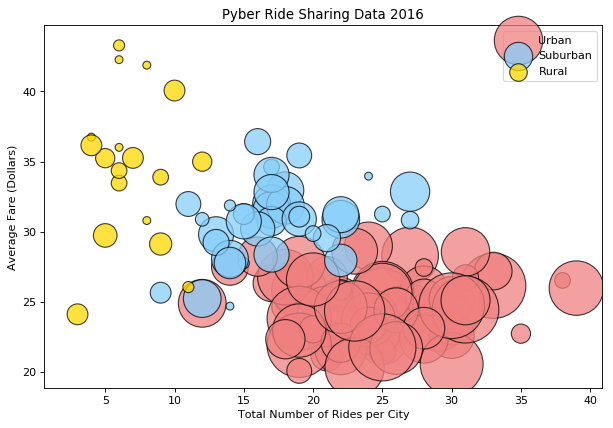

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80)
plt.scatter(total_data_urban['ride_id'],total_data_urban['fare'],s=total_data_urban['driver_count']*50, color= 'LightCoral',alpha = .75,edgecolor ='black',label = 'Urban')
plt.scatter(total_data_suburban['ride_id'],total_data_suburban['fare'],s=total_data_suburban['driver_count']*50, color='LightSkyBlue',alpha = .75,edgecolor = 'black',label = 'Suburban')
plt.scatter(total_data_rural['ride_id'],total_data_rural['fare'],s=total_data_rural['driver_count']*50,color='Gold',alpha = .75,edgecolor ='black',label ='Rural')

##Labeling the scatterplot

plt.title("Pyber Ride Sharing Data 2016")
plt.legend(loc= "type")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare (Dollars)")

plt.savefig('bubble scatter plot')

plt.show()

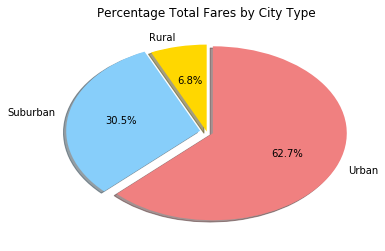

In [9]:
## PERCENTAGE OF TOTAL FARES BY CITY TYPE
Filter_data_fare= city_ride_merge.groupby("type").sum()
plt.title("Percentage Total Fares by City Type")
colors =["Gold", "LightSkyblue", "LightCoral"]
explode =(0, 0.05, 0.05)
plt.pie(Filter_data_fare["fare"],labels=Filter_data_fare.index,colors =colors,explode=explode,autopct="%1.1f%%",startangle=90,shadow=True)

plt.savefig('percent total fares')

plt.show()

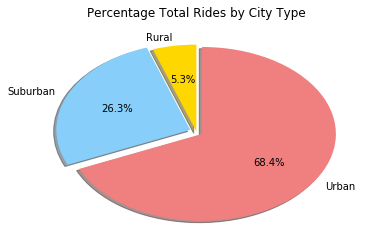

In [10]:
## PERCENTAGE OF TOTAL RIDES BY CITY TYPE
Filter_data_rides=city_ride_merge.groupby("type").count()
plt.title("Percentage Total Rides by City Type")
colors = ["Gold","LightSkyBlue","LightCoral"]
explode = (0, 0.05, 0.05)
plt.pie(Filter_data_rides["ride_id"],labels =Filter_data_rides.index,colors= colors,explode= explode,autopct="%1.1f%%",startangle=90,shadow=True)

plt.savefig('percent total rides')

plt.show()

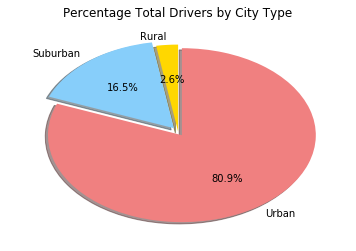

In [11]:
## PERCENTAGE OF TOTAL DRIVERS BY CITY TYPE
Filter_data_driver= (CityData.groupby("type")["driver_count"].sum()/CityData["driver_count"].sum()*100)
plt.title("Percentage Total Drivers by City Type")
colors = ["Gold","LightSkyBlue","LightCoral"]
explode =(0, 0.05, 0.05)
plt.pie(Filter_data_driver,labels=Filter_data_driver.index, colors=colors,explode=explode,autopct="%1.1f%%",startangle=90,shadow=True)

plt.savefig('percent total drivers')

plt.show()

In [12]:
Filter_data_driver

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [ ]:
##OBSEREVABLE TRENDS- 

# 1. The more number of rides, the lower is the average cost per ride (demand and supply)
# 2. urban areas dominate the ride share demand, probably the number is higher due to comparitive shorter distances.
# 3. maximum number of rides concentrated between 15 to 30 rides and mostly were concentrated in suburban areas and urban areas.